In [1]:
MY_PATH = ''
data_file = MY_PATH + 'ActualVsPredicted.csv'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import trapz

In [27]:
#Table shows the (actual) class label alongside the (predicted) response values of five classifiers A-E. 
df = pd.read_csv(data_file)

In [28]:
actual = df["(actual) class label"]
class_a = df["Classifier A"]
class_b = df["Classifier B"]
class_c = df["Classifier C"]
class_d = df["Classifier D"]
class_e = df["Classifier E"]

Question 1:

In [46]:
#Fill in the blanks with TP, FP, FN, TN, and the corresponding frequency value for each category. Also, write down the row sum or column sum in the last column and the last row, respectively.
class_stats = pd.DataFrame({'TP': [0, 0, 0, 0, 0], 'FP': [0, 0, 0, 0, 0], 'FN': [0, 0, 0, 0, 0], 'TN': [0, 0, 0, 0, 0]}, index=['Class A', 'Class B', 'Class C', 'Class D', 'Class E'])
for row in range(0, actual.size):
    if actual[row] == 'P' and class_a[row] == 'P':
        class_stats.iat[0, 0] += 1
    elif actual[row] == 'N' and class_a[row] == 'P':
        class_stats.iat[0, 1] += 1
    elif actual[row] == 'P' and class_a[row] == 'N':
        class_stats.iat[0, 2] += 1
    elif actual[row] == 'N' and class_a[row] == 'N':
        class_stats.iat[0, 3] += 1
for row in range(0, actual.size):
    if actual[row] == 'P' and class_b[row] == 'P':
        class_stats.iat[1, 0] += 1
    elif actual[row] == 'N' and class_b[row] == 'P':
        class_stats.iat[1, 1] += 1
    elif actual[row] == 'P' and class_b[row] == 'N':
        class_stats.iat[1, 2] += 1
    elif actual[row] == 'N' and class_b[row] == 'N':
        class_stats.iat[1, 3] += 1
for row in range(0, actual.size):
    if actual[row] == 'P' and class_c[row] == 'P':
        class_stats.iat[2, 0] += 1
    elif actual[row] == 'N' and class_c[row] == 'P':
        class_stats.iat[2, 1] += 1
    elif actual[row] == 'P' and class_c[row] == 'N':
        class_stats.iat[2, 2] += 1
    elif actual[row] == 'N' and class_c[row] == 'N':
        class_stats.iat[2, 3] += 1
for row in range(0, actual.size):
    if actual[row] == 'P' and class_d[row] == 'P':
        class_stats.iat[3, 0] += 1
    elif actual[row] == 'N' and class_d[row] == 'P':
        class_stats.iat[3, 1] += 1
    elif actual[row] == 'P' and class_d[row] == 'N':
        class_stats.iat[3, 2] += 1
    elif actual[row] == 'N' and class_d[row] == 'N':
        class_stats.iat[3, 3] += 1
for row in range(0, actual.size):
    if actual[row] == 'P' and class_e[row] == 'P':
        class_stats.iat[4, 0] += 1
    elif actual[row] == 'N' and class_e[row] == 'P':
        class_stats.iat[4, 1] += 1
    elif actual[row] == 'P' and class_e[row] == 'N':
        class_stats.iat[4, 2] += 1
    elif actual[row] == 'N' and class_e[row] == 'N':
        class_stats.iat[4, 3] += 1
#display in frequencies
class_stats['TP'] = class_stats['TP']/20
class_stats['FP'] = class_stats['FP']/20
class_stats['FN'] = class_stats['FN']/20
class_stats['TN'] = class_stats['TN']/20
class_stats

,TP,FP,FN,TN
Class A,0.30,0.20,0.20,0.30
Class B,0.25,0.25,0.25,0.25
Class C,0.30,0.30,0.20,0.20
Class D,0.20,0.20,0.30,0.30
Class E,0.25,0.25,0.25,0.25


In [35]:
data_file2 = MY_PATH + 'sample_prediction_2.csv'
df2 = pd.read_csv(data_file2)

Question 2:

In [68]:
#Python code that computes TP, FP, FN, TN, accuracy, precision, recall, F1-score, TPR, and FPR for each threshold t. 
def calculate_classification_metrics(ts):
    metrics = {}

    y_val = df2["actual"]
    y_pred = df2["prediction"]

    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    for t in ts:
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
        #calculate the accuracy
        accuracy = (tp + tn) / (tp + tn + fp + fn)
        #calculate the precision
        precision = tp / (tp + fp)
        #calculate the recall
        recall = tp / (tp + fn)
        #calculate the f1 score
        f1 = 2 * (precision * recall) / (precision + recall)
        #calculate the tpr
        tpr = tp / (tp + fn)
        #calculate the fpr
        fpr = fp / (fp + tn)

        metrics[t] = {
            'tp': tp,
            'fp': fp,
            'fn': fn,
            'tn': tn,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'tpr': tpr,
            'fpr': fpr
        }
    #print the results
    return metrics

In [90]:
class_metrics = pd.DataFrame(calculate_classification_metrics([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])).T
class_metrics

C:\Users\amcga\AppData\Local\Temp\ipykernel_9496\1598147503.py:20: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp / (tp + fp)


,tp,fp,fn,tn,accuracy,precision,recall,f1,tpr,fpr
0.0,10.0,10.0,0.0,0.0,0.50,0.500000,1.0,0.666667,1.0,1.0
0.1,10.0,10.0,0.0,0.0,0.50,0.500000,1.0,0.666667,1.0,1.0
0.2,10.0,7.0,0.0,3.0,0.65,0.588235,1.0,0.740741,1.0,0.7
0.3,10.0,6.0,0.0,4.0,0.70,0.625000,1.0,0.769231,1.0,0.6
0.4,9.0,5.0,1.0,5.0,0.70,0.642857,0.9,0.750000,0.9,0.5
0.5,8.0,3.0,2.0,7.0,0.75,0.727273,0.8,0.761905,0.8,0.3
0.6,7.0,1.0,3.0,9.0,0.80,0.875000,0.7,0.777778,0.7,0.1
0.7,4.0,1.0,6.0,9.0,0.65,0.800000,0.4,0.533333,0.4,0.1
0.8,2.0,0.0,8.0,10.0,0.60,1.000000,0.2,0.333333,0.2,0.0
0.9,1.0,0.0,9.0,10.0,0.55,1.000000,0.1,0.181818,0.1,0.0


Question 3:

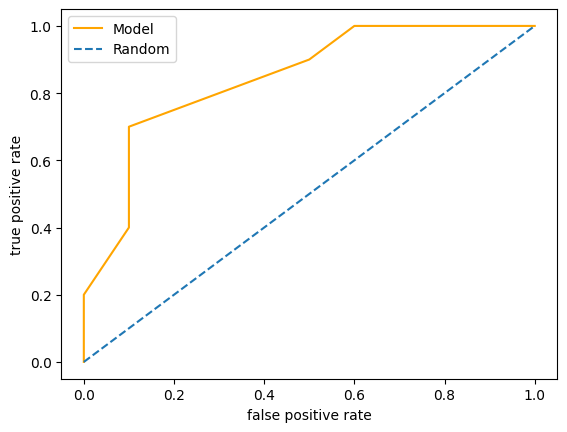

AUC: 0.845


In [109]:
#Python code that generates both ROC (Receiver Operating Characteristic) curve and computes AUC (Area Under Curve) value for Classifier F.
#first get TPR and FPR values for different thresholds
tpr = class_metrics['tpr']
fpr = class_metrics['fpr']
tpr = tpr.to_numpy()
fpr = fpr.to_numpy()
#generate the ROC curve
plt.plot(fpr, tpr, linestyle='-',color='orange', label='Model')
#plot the random classifier
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
#label the axes
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
#show the legend
plt.legend()
#show the plot
plt.show()
#calculate the AUC
auc = np.trapz(tpr, fpr)
print('AUC: %.3f' % abs(auc))

In [8]:
#Compute the sample means and standard deviations for the 2 data sets
import random


x = df[1.33, 1.87, 1.5, 1.53, 0.88, 1.49, 1.83, 1.86, 1.26, 2.1]
y = df[3.18, 3.08, 2.76, 3.37, 3.57, 2.91, 2.93, 3.66, 3.9, 3.87]
means_and_stds = pd.DataFrame(columns=['mean', 'std'])
means_and_stds.loc['x'] = [np.mean(x), np.std(x)]
means_and_stds.loc['y'] = [np.mean(y), np.std(y)]
means_and_stds


NameError: name 'df' is not defined

In [7]:
#compute the deviation of each data point from the sample mean and the sample variance for the 2 data sets
def compute_deviation_and_variance(data):
    deviation = []
    for i in data:
        deviation.append(i - np.mean(data))
    variance = np.var(data)
    return deviation, variance

deviation_and_variance = pd.DataFrame(columns=['deviation', 'variance'])
deviation_and_variance.loc['x'] = compute_deviation_and_variance(x)
deviation_and_variance.loc['y'] = compute_deviation_and_variance(y)

AttributeError: 'list' object has no attribute 'apply'